# Measuring the Josephson Current, the gap voltage and the normal state resistance at 1263ohm 
** **
 * This project uses the lmfit package. Lmfit provides curve fiting using non-linear least squares minimization and was developed by Matt Newville: https://github.com/newville.

## Install and import libraries

In [1]:
#uncomment the following line to install lmfit
#!pip install lmfit

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from lmfit.models import LinearModel
import math

## Data

In [3]:
#Load the data
df = pd.read_csv("./Data/1263_one_pass.csv", sep = " ", header = None)

#Preview the data
df.head()

,0,1,2
0,-7.895,-62.2197,0.00315
1,-7.796,-60.8144,0.00308
2,-7.471,-58.1212,0.00294
3,-7.097,-55.3393,0.00280
4,-6.807,-52.5137,0.00266


## Data wrangling

In [4]:
#Ascribe the columns to the V and I varibles 
V = list(df[0])
I = list(df[1])

#Preview the data
print("V = ", V)
print("I = ", I )

V =  [-7.895, -7.796, -7.471, -7.097, -6.807, -6.475, -6.157, -5.889, -5.564, -5.254, -4.985, -4.675, -4.399, -4.11, -3.82, -3.538, -3.213, -2.853, -2.846, -2.817, -2.803, -2.782, -2.761, -2.747, -2.733, -2.733, -2.733, -2.705, -0.459, 0.057, 0.042, 0.057, 0.035, 0.064, 0.028, 2.867, 2.895, 2.895, 2.895, 2.916, 2.938, 3.368, 3.658, 3.912, 4.18, 4.449, 4.738, 5.014, 5.282, 5.571, 5.882, 6.15, 6.433, 6.758, 7.054, 7.351, 7.647, 8.001, 8.332, 8.128, 7.916, 7.746, 7.549, 7.372, 7.167, 6.984, 6.779, 6.624, 6.433, 6.235, 6.045, 5.875, 5.684, 5.508, 5.345, 5.155, 4.971, 4.837, 4.646, 4.47, 4.35, 4.166, 3.997, 3.799, 3.658, 3.46, 3.008, 2.994, 2.994, 2.98, 2.98, 2.966, 2.966, 2.966, 2.938, 2.938, 2.938, 2.923, 2.923, 2.902, 2.895, 2.895, 2.867, 2.881, 2.846, 2.796, 0.113, 0.106, 0.12, 0.113, 0.12, 0.12, 0.113, 0.12, 0.113, 0.113, -2.719, -2.719, -2.719, -2.719, -2.726, -2.733, -2.747, -2.747, -2.789, -2.789, -3.255, -3.432, -3.615, -3.771, -3.94, -4.096, -4.3, -4.47, -4.661, -4.844, -5.035, -5

In [5]:
lower_limit = V.index(0.057) + 5
upper_limit = V.index(5.282)

print(lower_limit)
print(upper_limit)

34
48


In [6]:
#Remove the data above the chosen upper limit to enhance the view and focus on the single forward pass
V = np.array(V[lower_limit:upper_limit])

I = np.array(I[lower_limit:upper_limit])

#Preview the new subsets
print("V = ", V)
print("I = ", I)

V =  [0.028 2.867 2.895 2.895 2.895 2.916 2.938 3.368 3.658 3.912 4.18  4.449
 4.738 5.014]
I =  [10.5334 12.5076 14.5214 16.246  18.2918 20.4127 22.3807 24.3154 26.7535
 28.8341 31.0389 32.9722 35.3373 37.4268]


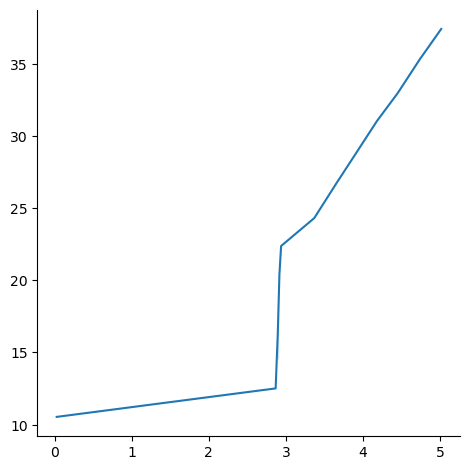

In [7]:
#Uncomment the line below to make the graph interactive
#%matplotlib widget

#Preview the data
sns.relplot(x = V, y = I, kind = "line")

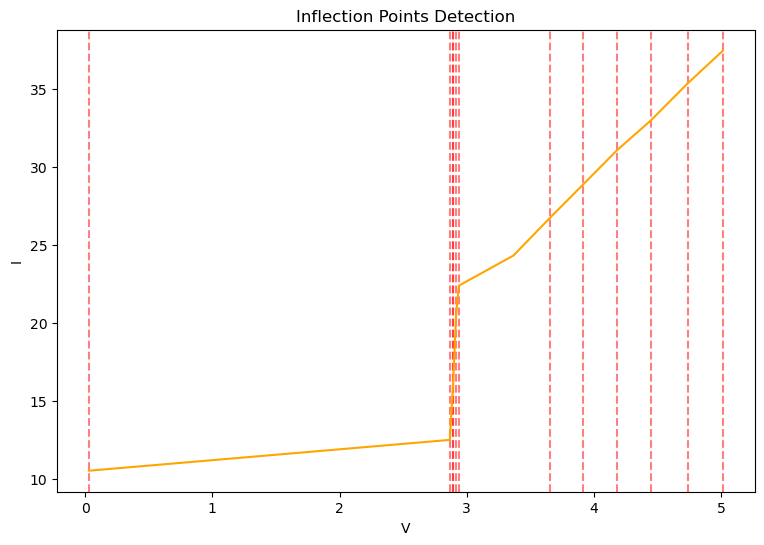

In [8]:
#Uncomment the line below to make the graph interactive
#%matplotlib widget

#Set figure size
plt.figure(figsize=(9,6))

# Define the data
V = np.array(V)
I = np.array(I)


# Define the window size
window_size = 6

# Calculate the moving averages
V_avg = np.convolve(V, np.ones(window_size)/window_size, mode='same')
I_avg = np.convolve(I, np.ones(window_size)/window_size, mode='same')

# Calculate the standard deviations
V_std = np.std(V)
I_std = np.std(I)

# Calculate the z-scores
V_z = (V - V_avg) / V_std
I_z = (I - I_avg) / I_std

# Calculate the change points
change_points = []
for i in range(len(V_z)):
    if abs(V_z[i]) > 3 or abs(I_z[i]) > 0.1:
        change_points.append(i)

# Mark the change points on the plot
for point in change_points:
    plt.axvline(V[point], color='r', linestyle='--', alpha=0.5)

    
# Plot the data again
sns.lineplot(x=V, y=I, color = 'orange')  
    
# Set plot labels and title
plt.xlabel('V')
plt.ylabel('I')
plt.title('Inflection Points Detection')

# Show the plot
plt.show()

### Clear the graph above to focus on Ic and Vc

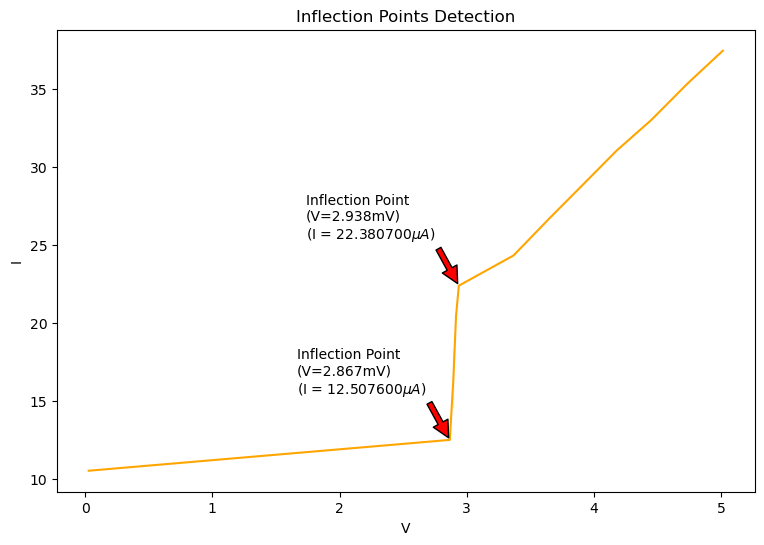

In [9]:
#Uncomment the line below to make the graph interactive
#%matplotlib widget

#Set figure size
plt.figure(figsize=(9,6))

# Define the window size
window_size = 6

# Calculate the moving averages
V_avg = np.convolve(V, np.ones(window_size)/window_size, mode='same')
I_avg = np.convolve(I, np.ones(window_size)/window_size, mode='same')

# Calculate the standard deviations
V_std = np.std(V)
I_std = np.std(I)

# Calculate the z-scores
V_z = (V - V_avg) / V_std
I_z = (I - I_avg) / I_std

# Calculate the change points
change_points = []
for i in range(len(V_z)):
    if abs(V_z[i]) > 3 or abs(I_z[i]) > 0.1:
        change_points.append(i)

# Annotate inflection points on the graph
for idx, point in enumerate(change_points):
    if idx in [1, 5]:
        plt.annotate(f'Inflection Point\n(V={V[point]:.3f}mV)\n(I = {np.interp(V[point], V, I):3f}$\mu A$)', 
                     xy=(V[point], np.interp(V[point], V, I)),
                     xytext=(V[point] - 1.2, np.interp(V[point], V, I) + 3),
                     arrowprops={'facecolor': 'red', 'shrink': 0.05})

    
# Plot the data again
sns.lineplot(x=V, y=I, color = 'orange')  
    
# Set plot labels and title
plt.xlabel('V')
plt.ylabel('I')
plt.title('Inflection Points Detection')

# Show the plot
plt.show()

# Estimating the normal state resistance (Rn)

In [10]:
#Preview the main dataset
print(list(df[0]))

[-7.895, -7.796, -7.471, -7.097, -6.807, -6.475, -6.157, -5.889, -5.564, -5.254, -4.985, -4.675, -4.399, -4.11, -3.82, -3.538, -3.213, -2.853, -2.846, -2.817, -2.803, -2.782, -2.761, -2.747, -2.733, -2.733, -2.733, -2.705, -0.459, 0.057, 0.042, 0.057, 0.035, 0.064, 0.028, 2.867, 2.895, 2.895, 2.895, 2.916, 2.938, 3.368, 3.658, 3.912, 4.18, 4.449, 4.738, 5.014, 5.282, 5.571, 5.882, 6.15, 6.433, 6.758, 7.054, 7.351, 7.647, 8.001, 8.332, 8.128, 7.916, 7.746, 7.549, 7.372, 7.167, 6.984, 6.779, 6.624, 6.433, 6.235, 6.045, 5.875, 5.684, 5.508, 5.345, 5.155, 4.971, 4.837, 4.646, 4.47, 4.35, 4.166, 3.997, 3.799, 3.658, 3.46, 3.008, 2.994, 2.994, 2.98, 2.98, 2.966, 2.966, 2.966, 2.938, 2.938, 2.938, 2.923, 2.923, 2.902, 2.895, 2.895, 2.867, 2.881, 2.846, 2.796, 0.113, 0.106, 0.12, 0.113, 0.12, 0.12, 0.113, 0.12, 0.113, 0.113, -2.719, -2.719, -2.719, -2.719, -2.726, -2.733, -2.747, -2.747, -2.789, -2.789, -3.255, -3.432, -3.615, -3.771, -3.94, -4.096, -4.3, -4.47, -4.661, -4.844, -5.035, -5.211,

In [11]:
#The dataset includes points from two complete sweeps
#Identify the index of the approximate limits of the normal state on the positive side of the graph 

#Function for finding the last occurrence of an item in a list
# def find_last_occurrence(value, list):
#     for i, item in enumerate(list):
#         if item == value:
#             last_occurrence = i
#     return last_occurrence

#Function for detecting the first occurrence of an item in a list
def find_first_occurrence(value, list):
    for i, item in enumerate(list):
        if item == value:
            first_occurrence = i
            break
    return first_occurrence

print(find_first_occurrence(2.938, list(df[0]))) #the second change point above
print(list(df[0]).index(df[0].max()))

40
58


In [12]:
#Select data from the first pass
V_n = np.array(df[0][40:58])
I_n = np.array(df[1][40:58])

#Preview the data
print(V_n)
print(I_n)

[2.938 3.368 3.658 3.912 4.18  4.449 4.738 5.014 5.282 5.571 5.882 6.15
 6.433 6.758 7.054 7.351 7.647 8.001]
[22.3807 24.3154 26.7535 28.8341 31.0389 32.9722 35.3373 37.4268 40.0395
 42.2593 44.4559 46.9028 49.0141 51.4645 53.8255 56.5603 58.9077 61.3055]


## Define the model and fit the data

In [13]:
#Define the variables and convert to Volts and Amps
x = V_n / 0.001
y = I_n / 0.000001

#Use builtin NameModel, specify prefix for each:
mod = LinearModel(prefix='') 

#Set the initial parameters to 'guess' mode
pars  = mod.guess(y, x = x)

#Fit with weights=1/yerr
result = mod.fit(y, pars, x = x, weights= 1. / (y * 0.01343))

#Print the fit results
print(result.fit_report())

[[Model]]
    Model(linear)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 7
    # data points      = 18
    # variables        = 2
    chi-square         = 16.0178195
    reduced chi-square = 1.00111372
    Akaike info crit   = 1.89994109
    Bayesian info crit = 3.68068460
    R-squared          = 1.00000000
[[Variables]]
    slope:      7850.46461 +/- 82.8258786 (1.06%) (init = 7929.778)
    intercept: -1619167.40 +/- 395820.914 (24.45%) (init = -2021395)
[[Correlations]] (unreported correlations are < 0.100)
    C(slope, intercept) = -0.9577


## Plot the model

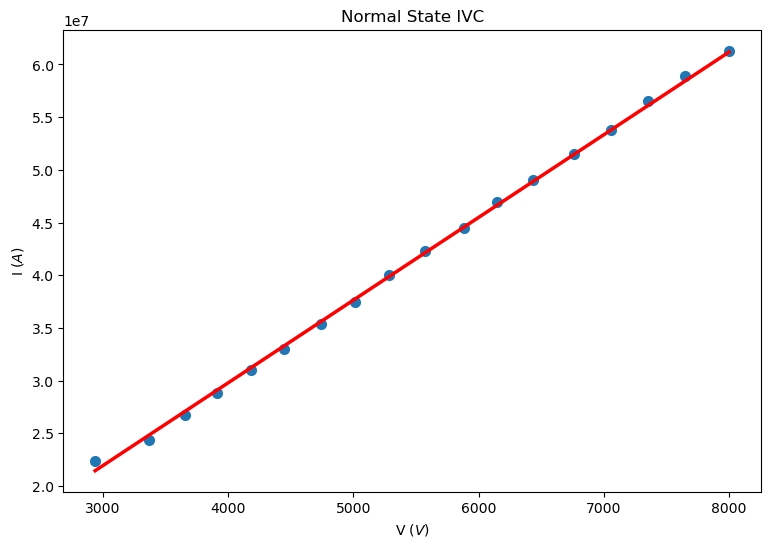

In [14]:
#Set the figure size
plt.figure(figsize = (9,6))

#Plot the data and the model
plt.scatter(x, y, linewidth=2)
plt.plot(x, result.best_fit, 'r-', linewidth=2.5)

# Set plot labels and title
plt.xlabel('V ($V$)')
plt.ylabel('I ($A$)')
plt.title('Normal State IVC')

#Show the plot
plt.show()

# Calculating the theoretical Ic and V_gap

![](./img/Ic_formula.png)

In [15]:
#Access the model parameters
varys = result.params.valuesdict()

varys

{'slope': 7850.464605203067, 'intercept': -1619167.403584918}

In [16]:
#The slope is equal to 1 / R 
R_n = 1 / varys.get("slope")

print('Normal state resistance: R_n = ', round(R_n, 6), 'Ohm') 

Normal state resistance: R_n =  0.000127 Ohm


In [17]:
#Define the terms for the strong and weak coupling formulas 
t_c = 9.25 #critical temperature
delta_0 = 2.25288819E-22 # from 1.764 * k_B * t_c,  [check eqn. 1 on the report paper] 
t = 4.59101642 #from the calibration curve in notebook 2
e = 1.6022E-19 #elementay charge
pi = 3.14159265358979323846264338327950 
t_red = t / t_c #the reduced temperature
k_B = 1.3807E-23 #Boltzmann constant
R_n = 1 / varys.get("slope") #from the slope of the IVC


#weak coupling formula

delta_weak = delta_0 * 1.74 * math.sqrt(1.0 - t_red)

E_weak = delta_weak * 2

V_weak = (E_weak / e) * 1000

#The Ambegaokar-Baratoff formula
Ic_weak = (pi / 2) * (delta_weak / (e * R_n)) * math.tanh(delta_weak / (2 * k_B * t))


#strong coupling approximation

delta_strong = (delta_0) * math.sqrt(math.cos((pi * t_red**2)  / 2 )) 

E_strong = delta_strong * 2

V_strong = (E_strong / e) * 1000

#The Ambegaokar-Baratoff formula
Ic_strong = (pi / 2) * (delta_strong / (e * R_n)) * math.tanh(delta_strong / (2 * k_B * t))


#Print the results
print('Temperature =', t, 'K')
print('-----------------------------')
print('-----------------------------')
                         
print('Weak Coupling Formula')
print('-----------------------------')


print('delta_t =', delta_weak, 'J')
print('Gap Energy =', E_weak, 'J')
print('Gap Voltage =', V_weak, 'mV')
print('Josephson Current =', Ic_weak, 'uA')
print('______________________________')
print('______________________________')
print('------------------------------')
print('Strong Coupling Approximation')
print('------------------------------')

print('delta_t =', delta_strong, 'J')
print('Gap Energy = ', E_strong, 'J')
print('Gap Voltage =', V_strong, 'mV')
print('Josephson Current =', Ic_strong, 'uA')
print('________________________________')
print('________________________________')
print('________________________________')

Temperature = 4.59101642 K
-----------------------------
-----------------------------
Weak Coupling Formula
-----------------------------
delta_t = 2.7820415390514426e-22 J
Gap Energy = 5.564083078102885e-22 J
Gap Voltage = 3.472776855637801 mV
Josephson Current = 20.887119312843478 uA
______________________________
______________________________
------------------------------
Strong Coupling Approximation
------------------------------
delta_t = 2.168004981197949e-22 J
Gap Energy =  4.336009962395898e-22 J
Gap Voltage = 2.7062850845062396 mV
Josephson Current = 15.629346036584817 uA
________________________________
________________________________
________________________________


In [18]:
#Add all the collected results to a dictionary
Josephson_data = {"Ic" : np.interp(V[5], V, I) , "Ic_weak" : round(Ic_weak, 4), "Ic_strong" : round(Ic_strong, 4), "V_gap" : V[1], "Vg_weak" : round(V_weak, 4), "Vg_strong" : round(V_strong, 4), "Temp" : round(t, 4)}

#Preview the newly created row of data
print(Josephson_data)

{'Ic': 20.4127, 'Ic_weak': 20.8871, 'Ic_strong': 15.6293, 'V_gap': 2.867, 'Vg_weak': 3.4728, 'Vg_strong': 2.7063, 'Temp': 4.591}


## Export the results to a csv file

In [19]:
import csv

with open(r'./Data/Josephson_data.csv', 'a', newline='') as csvfile:
    fieldnames = ['Ic','Ic_weak', 'Ic_strong', 'V_gap', 'Vg_weak', 'Vg_strong', 'Temp']
    writer = csv.DictWriter(csvfile, fieldnames=fieldnames)

    writer.writerow(Josephson_data)

## Author
** **

### <a href="https://www.linkedin.com/in/alin-airinei/">Alin Airinei</a>